In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Admin\Downloads\archive\coin_markets_hourly_2.csv")
df.shape



(72750, 10)

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72750 entries, 0 to 72749
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   timestamp                    72750 non-null  object 
 1   id                           72750 non-null  object 
 2   symbol                       72750 non-null  object 
 3   name                         72750 non-null  object 
 4   current_price                72750 non-null  float64
 5   market_cap                   72750 non-null  int64  
 6   total_volume                 72750 non-null  float64
 7   high_24h                     72459 non-null  float64
 8   low_24h                      72459 non-null  float64
 9   price_change_percentage_24h  72459 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 5.6+ MB


In [3]:
# EDA PERFORMING
df.isna().sum()


timestamp                        0
id                               0
symbol                           0
name                             0
current_price                    0
market_cap                       0
total_volume                     0
high_24h                       291
low_24h                        291
price_change_percentage_24h    291
dtype: int64

In [4]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour

print("Min timestamp:", df["timestamp"].min())
print("Max timestamp:", df["timestamp"].max())


Min timestamp: 2025-06-20 06:58:22.131159
Max timestamp: 2025-06-20 07:58:20.467323


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72750 entries, 0 to 72749
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    72750 non-null  datetime64[ns]
 1   id                           72750 non-null  object        
 2   symbol                       72750 non-null  object        
 3   name                         72750 non-null  object        
 4   current_price                72750 non-null  float64       
 5   market_cap                   72750 non-null  int64         
 6   total_volume                 72750 non-null  float64       
 7   high_24h                     72459 non-null  float64       
 8   low_24h                      72459 non-null  float64       
 9   price_change_percentage_24h  72459 non-null  float64       
 10  date                         72750 non-null  object        
 11  hour                         72750 non-nu

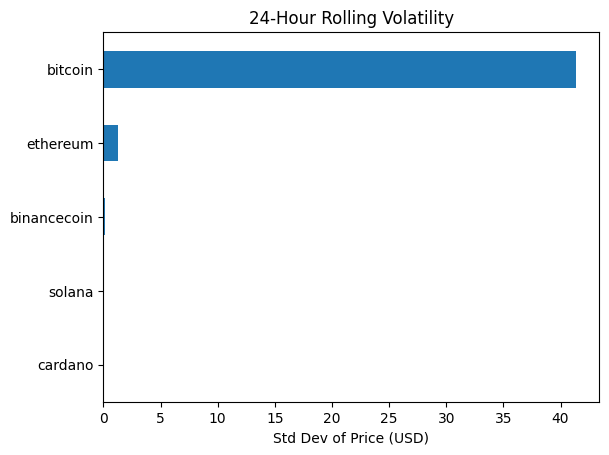

In [6]:
coins = ["bitcoin", "ethereum", "cardano", "solana", "binancecoin"]

vol_dict = {}

for c in coins:
    series = df[df["id"] == c]["current_price"].rolling(window=24).std()
    vol_dict[c] = series.iloc[-1]   # last calculated volatility

pd.Series(vol_dict).sort_values().plot(kind="barh", title="24-Hour Rolling Volatility")
plt.xlabel("Std Dev of Price (USD)")
plt.show()


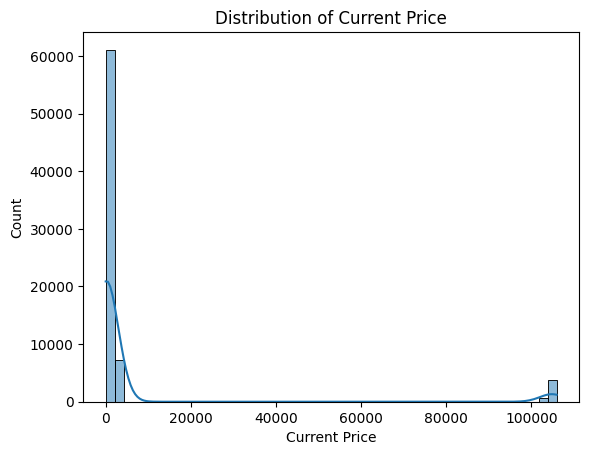

In [7]:
plt.figure()
sns.histplot(df["current_price"], bins=50, kde=True)
plt.title("Distribution of Current Price")
plt.xlabel("Current Price")
plt.ylabel("Count")
plt.show()

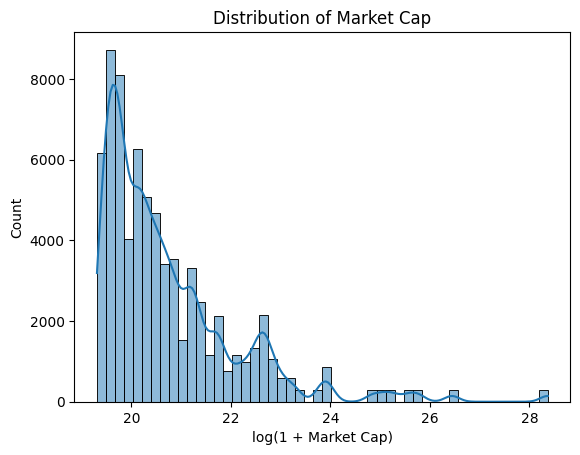

In [10]:
plt.figure()
sns.histplot(np.log1p(df["market_cap"]), bins=50, kde=True)
plt.title("Distribution of Market Cap")
plt.xlabel("log(1 + Market Cap)")
plt.ylabel("Count")
plt.show()

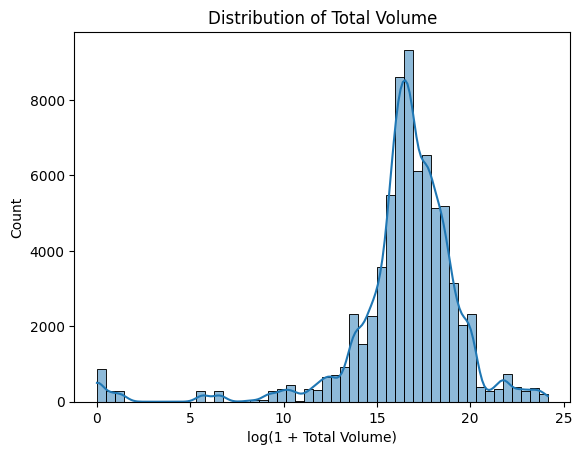

In [9]:
plt.figure()
sns.histplot(np.log1p(df["total_volume"]), bins=50, kde=True)
plt.title("Distribution of Total Volume")
plt.xlabel("log(1 + Total Volume)")
plt.ylabel("Count")
plt.show()

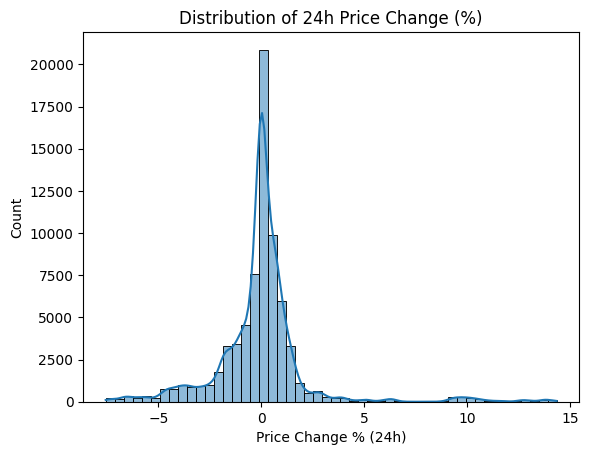

In [9]:
plt.figure()
sns.histplot(df["price_change_percentage_24h"].dropna(), bins=50, kde=True)
plt.title("Distribution of 24h Price Change (%)")
plt.xlabel("Price Change % (24h)")
plt.ylabel("Count")
plt.show()

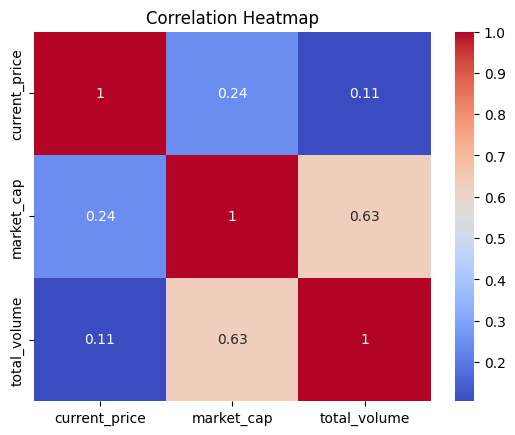

In [10]:
num_cols = ["current_price", "market_cap", "total_volume"]
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
#STEP 2: DATA PREPROCESSING & FEATURE SELECTION

In [12]:
df = df.dropna(subset=["current_price", "market_cap", "total_volume"])
df.shape

(72750, 12)

In [20]:
df = df.dropna()
print(df.isna().sum())


timestamp                      0
id                             0
symbol                         0
name                           0
current_price                  0
market_cap                     0
total_volume                   0
high_24h                       0
low_24h                        0
price_change_percentage_24h    0
date                           0
hour                           0
dtype: int64


In [11]:
features = ["market_cap", "total_volume"] 
target = "current_price"                    

X = df[features]
y = df[target]

X = np.log1p(X)   
y = np.log1p(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (58200, 2)
Test shape: (14550, 2)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1) Create model
lin_reg = LinearRegression()

# 2) Train model
lin_reg.fit(X_train, y_train)

# 3) Predictions
y_train_pred_lr = lin_reg.predict(X_train)
y_test_pred_lr  = lin_reg.predict(X_test)

# 4) Metrics
r2_train_lr  = r2_score(y_train, y_train_pred_lr)
r2_test_lr   = r2_score(y_test, y_test_pred_lr)
rmse_train_lr = mean_squared_error(y_train, y_train_pred_lr) ** 0.5
rmse_test_lr  = mean_squared_error(y_test, y_test_pred_lr) ** 0.5

print("===== LINEAR REGRESSION =====")
print("Train R² :", r2_train_lr)
print("Test  R² :", r2_test_lr)
print("Train RMSE:", rmse_train_lr)
print("Test  RMSE:", rmse_test_lr)


===== LINEAR REGRESSION =====
Train R² : 0.1443332683661216
Test  R² : 0.14484782682261466
Train RMSE: 3.095124207541968
Test  RMSE: 3.1072017179059257


In [48]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# POLYNOMIAL REGRESSION MODEL
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

# Train model
poly_model.fit(X_train, y_train)

# Predict
y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Metrics
r2_train_poly  = r2_score(y_train, y_train_pred_poly)
r2_test_poly   = r2_score(y_test, y_test_pred_poly)
rmse_train_poly = mean_squared_error(y_train, y_train_pred_poly) ** 0.5
rmse_test_poly  = mean_squared_error(y_test, y_test_pred_poly) ** 0.5

print("===== POLYNOMIAL REGRESSION =====")
print("Train R² :", r2_train_poly)
print("Test  R² :", r2_test_poly)
print("Train RMSE:", rmse_train_poly)
print("Test  RMSE:", rmse_test_poly)


===== POLYNOMIAL REGRESSION =====
Train R² : 0.19207516330213315
Test  R² : 0.19092928028725686
Train RMSE: 3.0075387946855505
Test  RMSE: 3.0223237828021934


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# DECISION TREE MODEL (tuned to reduce overfitting)
dt_model = DecisionTreeRegressor(
    max_depth=6,           # restrict depth to avoid overfitting
    min_samples_leaf=5,    # minimum samples per leaf
    random_state=42
)

# Train model
dt_model.fit(X_train, y_train)

# Predict
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt  = dt_model.predict(X_test)

# Metrics
r2_train_dt  = r2_score(y_train, y_train_pred_dt)
r2_test_dt   = r2_score(y_test, y_test_pred_dt)
rmse_train_dt = mean_squared_error(y_train, y_train_pred_dt)**0.5
rmse_test_dt  = mean_squared_error(y_test, y_test_pred_dt)**0.5

print("===== DECISION TREE REGRESSOR =====")
print("Train R² :", r2_train_dt)
print("Test  R² :", r2_test_dt)
print("Train RMSE:", rmse_train_dt)
print("Test  RMSE :", rmse_test_dt)

if r2_train_dt - r2_test_dt > 0.10:
    print("⚠️ Overfitting Present")
else:
    print("✅ No Major Overfitting")


===== DECISION TREE REGRESSOR =====
Train R² : 0.5827654360369384
Test  R² : 0.5677373009299005
Train RMSE: 2.1613042016089814
Test  RMSE : 2.209131798187406
✅ No Major Overfitting


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# RANDOM FOREST MODEL (tuned to avoid overfitting)
rf_model = RandomForestRegressor(
    n_estimators=150,    # number of trees
    max_depth=8,         # limit depth to control complexity
    min_samples_leaf=5,  # avoid tiny leaves
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train, y_train)

# Predict
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf  = rf_model.predict(X_test)

# Metrics
r2_train_rf  = r2_score(y_train, y_train_pred_rf)
r2_test_rf   = r2_score(y_test, y_test_pred_rf)
rmse_train_rf = mean_squared_error(y_train, y_train_pred_rf)**0.5
rmse_test_rf  = mean_squared_error(y_test, y_test_pred_rf)**0.5

print("===== RANDOM FOREST REGRESSOR =====")
print("Train R² :", r2_train_rf)
print("Test  R² :", r2_test_rf)
print("Train RMSE:", rmse_train_rf)
print("Test  RMSE :", rmse_test_rf)

if r2_train_rf - r2_test_rf > 0.10:
    print("⚠️ Overfitting Present")
else:
    print("✅ No Major Overfitting")


===== RANDOM FOREST REGRESSOR =====
Train R² : 0.8506065042304829
Test  R² : 0.8460390679704894
Train RMSE: 1.2932771469975641
Test  RMSE : 1.3184176616197345
✅ No Major Overfitting


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# GRADIENT BOOSTING (tuned)
gbr_model = GradientBoostingRegressor(
    n_estimators=150,   # number of boosting stages
    learning_rate=0.05, # controls update step size
    max_depth=3,        # depth of individual trees
    random_state=42
)

# Train model
gbr_model.fit(X_train, y_train)

# Predict
y_train_pred_gbr = gbr_model.predict(X_train)
y_test_pred_gbr  = gbr_model.predict(X_test)

# Metrics
r2_train_gbr  = r2_score(y_train, y_train_pred_gbr)
r2_test_gbr   = r2_score(y_test, y_test_pred_gbr)
rmse_train_gbr = mean_squared_error(y_train, y_train_pred_gbr)**0.5
rmse_test_gbr  = mean_squared_error(y_test, y_test_pred_gbr)**0.5

print("===== GRADIENT BOOSTING REGRESSOR =====")
print("Train R² :", r2_train_gbr)
print("Test  R² :", r2_test_gbr)
print("Train RMSE:", rmse_train_gbr)
print("Test  RMSE:", rmse_test_gbr)

if r2_train_gbr - r2_test_gbr > 0.10:
    print("⚠️ Overfitting Present")
else:
    print("✅ No Major Overfitting")


===== GRADIENT BOOSTING REGRESSOR =====
Train R² : 0.6862614300430548
Test  R² : 0.6792779368372897
Train RMSE: 1.874173163372323
Test  RMSE: 1.9028833450685014
✅ No Major Overfitting


In [53]:
df.isna().sum()

timestamp                      0
id                             0
symbol                         0
name                           0
current_price                  0
market_cap                     0
total_volume                   0
high_24h                       0
low_24h                        0
price_change_percentage_24h    0
date                           0
hour                           0
dtype: int64

In [54]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Polynomial Regression",
        "Decision Tree Regressor",
        "Random Forest Regressor",
        "Gradient Boosting Regressor"
    ],
    
    "Train R2": [
        r2_train_lr,
        r2_train_poly,
        r2_train_dt,
        r2_train_rf,
        r2_train_gbr
    ],
    
    "Test R2": [
        r2_test_lr,
        r2_test_poly,
        r2_test_dt,
        r2_test_rf,
        r2_test_gbr
    ],
    
    "Train RMSE": [
        rmse_train_lr,
        rmse_train_poly,
        rmse_train_dt,
        rmse_train_rf,
        rmse_train_gbr
    ],
    
    "Test RMSE": [
        rmse_test_lr,
        rmse_test_poly,
        rmse_test_dt,
        rmse_test_rf,
        rmse_test_gbr
    ]
})

print("\n===== FINAL MODEL ACCURACY COMPARISON =====\n")
print(results)



===== FINAL MODEL ACCURACY COMPARISON =====

                         Model  Train R2   Test R2  Train RMSE  Test RMSE
0            Linear Regression  0.144333  0.144848    3.095124   3.107202
1        Polynomial Regression  0.192075  0.190929    3.007539   3.022324
2      Decision Tree Regressor  0.582765  0.567737    2.161304   2.209132
3      Random Forest Regressor  0.850607  0.846039    1.293277   1.318418
4  Gradient Boosting Regressor  0.686261  0.679278    1.874173   1.902883


In [35]:
#Among all regression models implemented in the project, the Random Forest Regressor performed the best

In [13]:
# Predict on  dataset
y_pred_rf = rf_model.predict(X_test)

# Convert back from log scale to original price scale
actual_prices = np.expm1(y_test)
predicted_prices = np.expm1(y_pred_rf)

comparison_rf = pd.DataFrame({
    "Actual Price": actual_prices,
    "Predicted Price": predicted_prices
})

print("\n===== ACTUAL vs PREDICTED PRICE (FIRST 15 RESULTS) =====\n")
print(comparison_rf.head(15))


NameError: name 'rf_model' is not defined

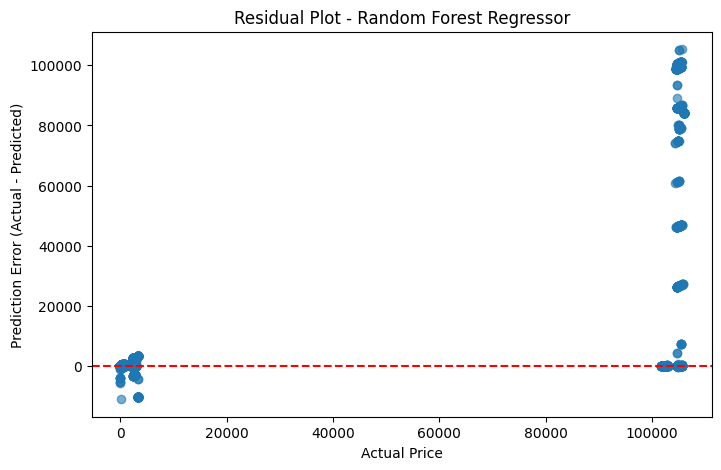

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals (errors)
residuals = actual_prices - predicted_prices

plt.figure(figsize=(8,5))
plt.scatter(actual_prices, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot - Random Forest Regressor")
plt.xlabel("Actual Price")
plt.ylabel("Prediction Error (Actual - Predicted)")
plt.show()


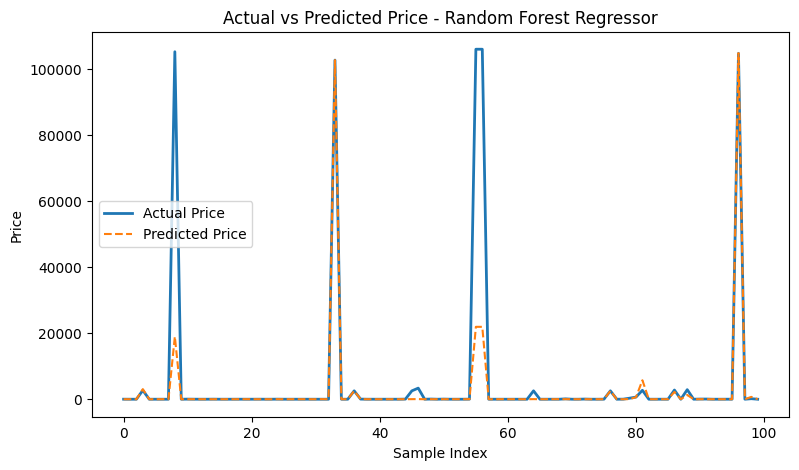

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.plot(actual_prices.values[:100], label="Actual Price", linewidth=2)
plt.plot(predicted_prices[:100], label="Predicted Price", linestyle="dashed")
plt.title("Actual vs Predicted Price - Random Forest Regressor")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.legend()
plt.show()


In [61]:
print("Summary:")
print("Five models were used in this project: Linear Regression, Polynomial Regression,")
print("Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor.")
print("Random Forest Regressor showed the best performance with the highest Test R2 score")
print("and lowest RMSE, meaning it predicts prices more accurately than other models.")
print("So, Random Forest was chosen as the final model.")


Summary:
Five models were used in this project: Linear Regression, Polynomial Regression,
Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor.
Random Forest Regressor showed the best performance with the highest Test R2 score
and lowest RMSE, meaning it predicts prices more accurately than other models.
So, Random Forest was chosen as the final model.
